# Team Name - TEAM 'C'

# Domain Name - Olympics - Athletes and results analysis

# Team Member Name 
#                    1) Arun Kumar P.S
#                    2) Sanved Oak S.O
#                    3) Iftikar Ali Ahmed
#                    4) Arun Ram R

# Data Set Source - Kaggle.com

# Data Dimension
 
# Data description:

# Column 1: Athlete ID
# Column 2: Athlete Name
# Column 3: Athlete Gender
# Column 4: Athlete Age
# Column 5: Athlete Height
# Column 6: Athlete Weight
# Column 7: Athlete Team (Country)
# Column 8: Athlete's Country NOC
# Column 9: Olympics Year and (Summer or winter)
# Column 10: Olympics Year
# Column 11: Olympics Season
# Column 12: Olympics Venue (city)
# Column 13: Type of Sport
# Column 14: type of event
# Column 4: Olympic Medal - Gold, Silver, Bronze and NA (participated but didn't bag a medal)

#w_gdp - Dataset
#Continents - Dataset
#Ethinicity - wikipedia

# P.S.1 - Are certain games being dominated by certain continents ? 

# P.S.2 - Do participants from certain continents have a higher average height?

# P.S.3 - predicting medal tally of 2020 olympics

# P.S.4 - Impact of countries gdp on winning medals

# P.S.5 - Men and Women Participation over the years

# PS 6:  Are players who won medals for US in Basketeball game are mostly african-american people.

# PS 7: probabilty for winnning medals between athletes participate in mulipile games vs athletes participate in single game

In [1]:
# 1) Are certain games dominated by certain continents 

import numpy as np,pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,5]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
os.chdir('D:\Manipal Pro learn\Term1\EDA\Dataset')
Olympics = pd.read_csv("athlete_events - Final.csv")

Continents = pd.read_csv("continents.csv")

In [2]:
Olympics.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
Olympics_Domination = Olympics[['Team', 'Year','Season','Sport','Medal']]

Olympics_Domination.sort_values(by= "Medal", ascending= True)

Olympics_Domination.head()

,Team,Year,Season,Sport,Medal
0,China,1992,Summer,Basketball,NaN
1,China,2012,Summer,Judo,NaN
2,Denmark,1920,Summer,Football,NaN
3,Denmark,1900,Summer,Tug-Of-War,Gold
4,Netherlands,1988,Winter,Speed Skating,NaN


In [4]:
Olympics_sorted = Olympics_Domination[Olympics_Domination['Medal'].isin(['Gold','Silver','Bronze'])]

Olympics_sorted.head()

,Team,Year,Season,Sport,Medal
3,Denmark,1900,Summer,Tug-Of-War,Gold
37,Finland,1920,Summer,Swimming,Bronze
38,Finland,1920,Summer,Swimming,Bronze
40,Finland,2014,Winter,Ice Hockey,Bronze
41,Finland,1948,Summer,Gymnastics,Bronze


In [5]:
Olympics_sorted = Total_match = pd.merge(Olympics_sorted, Continents, left_on='Team', 
                       right_on='Country')

Olympics_sorted.head()

,Team,Year,Season,Sport,Medal,Country,Continent
0,Denmark,1900,Summer,Tug-Of-War,Gold,Denmark,Europe
1,Denmark,1920,Summer,Gymnastics,Gold,Denmark,Europe
2,Denmark,1906,Summer,Football,Gold,Denmark,Europe
3,Denmark,1908,Summer,Wrestling,Bronze,Denmark,Europe
4,Denmark,1996,Summer,Handball,Gold,Denmark,Europe


In [6]:
Olympics_Graph = Olympics_sorted[['Continent','Sport','Medal']]

Olympics_Graph.sort_values(by= "Continent", ascending= True)

Olympics_Graph.head()

,Continent,Sport,Medal
0,Europe,Tug-Of-War,Gold
1,Europe,Gymnastics,Gold
2,Europe,Football,Gold
3,Europe,Wrestling,Bronze
4,Europe,Handball,Gold


In [7]:
continents_sport = Olympics_Graph.groupby(['Continent','Sport']).size().reset_index()
continents_sport.head()

,Continent,Sport,0
0,Africa,Art Competitions,2
1,Africa,Athletics,195
2,Africa,Boxing,41
3,Africa,Canoeing,1
4,Africa,Cycling,16


In [8]:
continents_sport_pivot = continents_sport.pivot('Sport','Continent',0)
continents_sport_pivot = continents_sport_pivot.fillna(0)
continents_sport_pivot.head()

Continent,Africa,Asia,Europe,North America,Oceania,South America
Sport,,,,,,
Aeronautics,0.0,0.0,1.0,0.0,0.0,0.0
Alpine Skiing,0.0,3.0,337.0,11.0,2.0,0.0
Alpinism,0.0,7.0,4.0,0.0,1.0,0.0
Archery,0.0,109.0,154.0,0.0,5.0,2.0
Art Competitions,2.0,2.0,125.0,2.0,0.0,0.0


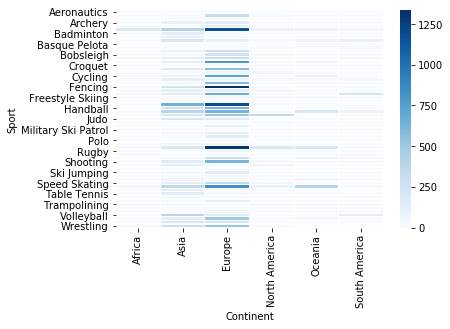

In [9]:
sns.heatmap(continents_sport_pivot,linewidths=0.1,cbar=True,cmap="Blues")
plt.rcParams['figure.figsize']=[15,5]

# ----------------------------------------End of P.S.1---------------------------------------------------

In [10]:
# P.S.2 - Do participants from certain continents have a higher average height

In [11]:
Olympics.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [12]:
Olympics_height = Olympics[['Team','Height']]

Olympics_height = Olympics_height.fillna(0)

Olympics_height = Olympics_height.sort_values(by= "Height", ascending= False)

Olympics_height.head()

,Team,Height
265040,China,226.0
265041,China,226.0
265042,China,226.0
32376,United States,223.0
207375,Lithuania,223.0


In [13]:
Olympics_height_sorted = pd.merge(Olympics_height, Continents, left_on='Team', 
                       right_on='Country')

Olympics_height_sorted.head()

,Team,Height,Country,Continent
0,China,226.0,China,Asia
1,China,226.0,China,Asia
2,China,226.0,China,Asia
3,China,221.0,China,Asia
4,China,218.0,China,Asia


In [15]:
Olympics_height_sorted = Olympics_height_sorted[['Height','Continent']]
Olympics_height_sorted = Olympics_height_sorted.groupby('Continent').mean()
Olympics_height_sorted.head()

,Height
Continent,
Africa,127.940286
Asia,152.180975
Europe,130.755109
North America,147.468041
Oceania,156.458510


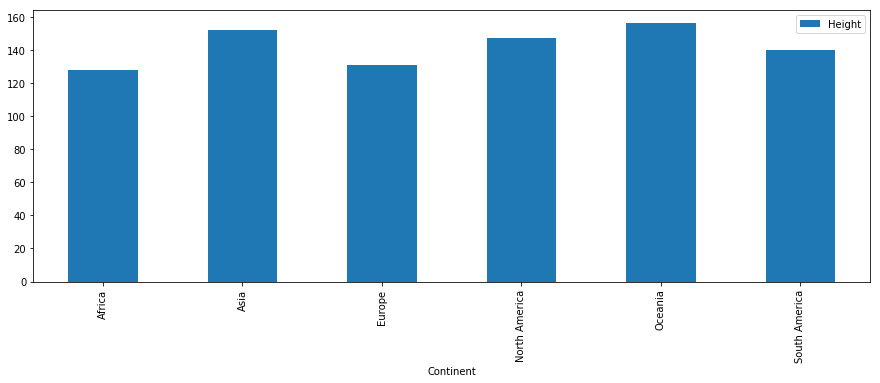

In [16]:
Olympics_height_sorted.plot(kind='bar')

# ----------------------------------------End of P.S.2---------------------------------------------------

In [17]:
#P.S3 predicting medal tally of 2020 olympics

In [19]:
olympics = Olympics
countryyearmedal = olympics[olympics['Medal'].isin(['Gold','Silver','Bronze']) & (olympics['Season'] == 'Summer')].groupby(['Team',"Year"]).size().reset_index()
countryyearmedal = countryyearmedal.rename(columns={0:'Medals Won'})
countryyearmedal.head()

,Team,Year,Medals Won
0,A North American Team,1900,4
1,Afghanistan,2008,1
2,Afghanistan,2012,1
3,Algeria,1984,2
4,Algeria,1992,2


In [20]:
countriesparticipation = countryyearmedal.groupby('Team').size().reset_index()
countriesparticipation = countriesparticipation[countriesparticipation[0] > 5]
countriesparticipation.head()

,Team,0
2,Algeria,7
10,Argentina,19
18,Australia,27
19,Austria,26
20,Azerbaijan,6


In [21]:
countryyearmedal = countryyearmedal[countryyearmedal['Team'].isin(countriesparticipation['Team'])]
countryyearmedal.head()

,Team,Year,Medals Won
3,Algeria,1984,2
4,Algeria,1992,2
5,Algeria,1996,3
6,Algeria,2000,5
7,Algeria,2008,2


In [22]:
def pred(df):
    lm = LinearRegression()
    model = lm.fit(df[['Year']],df[['Medals Won']])
    val_data = pd.DataFrame.from_dict( {'Year' : [2020]} )
    medalpredicted = model.predict(val_data)
    return int(medalpredicted)

In [23]:
medals2020 = pd.DataFrame()
for country in countryyearmedal['Team'].unique():
    cur_row = {
        'Team' : country,
        '2020' : pred(countryyearmedal[countryyearmedal['Team'] == country])
    }
    medals2020 = medals2020.append( cur_row,ignore_index=True)
medals2020.head() 

,2020,Team
0,1.0,Algeria
1,26.0,Argentina
2,114.0,Australia
3,3.0,Austria
4,18.0,Azerbaijan


In [24]:
#Top 10 countries that may win medals in 2020
medals2020.sort_values(by = '2020',ascending = False).head(10)

,2020,Team
71,276.0,United States
56,233.0,Russia
26,199.0,Germany
12,148.0,China
2,114.0,Australia
75,83.0,Yugoslavia
61,74.0,South Korea
37,71.0,Japan
35,66.0,Italy
27,65.0,Great Britain


# ----------------------------------------End of P.S.3---------------------------------------------------

In [25]:
#P.S.4 Impact of countries gdp on winning medals

In [26]:
countrygdp = pd.read_excel("w_gdp.xlsx",skiprows=3)
countrygdp2016 = countrygdp[['Country Name','2016']]
countrygdp2016.head()

,Country Name,2016
0,Aruba,NaN
1,Afghanistan,1.946902e+10
2,Angola,9.533511e+10
3,Albania,1.186387e+10
4,Andorra,2.858518e+09


In [27]:
olmpics2016 = olympics[olympics['Year'] == 2016]
olmpics2016.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


In [28]:
olmpics2016medalwinners = olmpics2016[olmpics2016['Medal'].isin(['Gold','Silver','Bronze'])]
olmpics2016medalwinners.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [29]:
oly2016countrymedals = olmpics2016medalwinners.groupby('Team').size().reset_index()
oly2016countrymedals.head()

,Team,0
0,Algeria,2
1,Argentina,22
2,Armenia,4
3,Australia,82
4,Austria,2


In [30]:
countrymedalsgdp = oly2016countrymedals.merge(countrygdp2016,how='left',left_on='Team',right_on='Country Name')
countrymedalsgdp = countrymedalsgdp.dropna()
countrymedalsgdp = countrymedalsgdp.rename(columns={0:'Medals won','2016':'GDP'})
countrymedalsgdp = countrymedalsgdp[['Team','Medals won','GDP']]
countrymedalsgdp = countrymedalsgdp.set_index('Team')
countrymedalsgdp.head()

,Medals won,GDP
Team,,
Algeria,2,1.590491e+11
Argentina,22,5.454761e+11
Armenia,4,1.057230e+10
Australia,82,1.204616e+12
Austria,2,3.908000e+11


In [31]:
#contribution of top 10 gdp countries to medals
countrymedalsgdp.sort_values(by='GDP',ascending=False).head(10)['Medals won'].sum()*100 / countrymedalsgdp['Medals won'].sum()

55.28358208955224

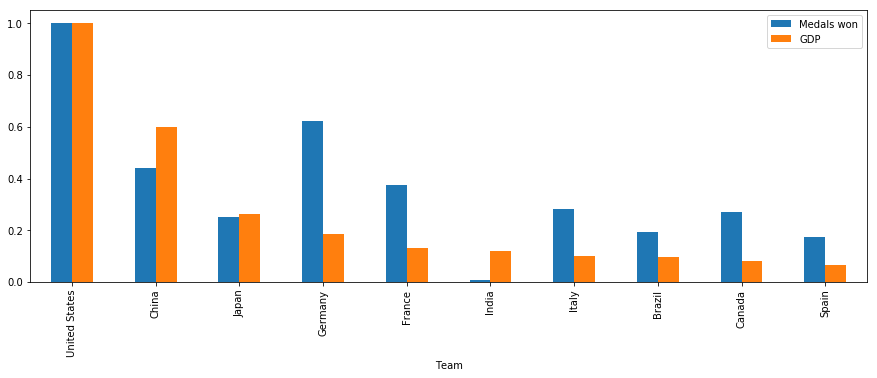

In [32]:
#normalizing GDP and Medals
countrymedalsgdp['GDP'] = countrymedalsgdp['GDP'] / max(countrymedalsgdp['GDP'])
countrymedalsgdp['Medals won'] = countrymedalsgdp['Medals won'] / max(countrymedalsgdp['Medals won'])
countrymedalsgdp.sort_values(by='GDP',ascending=False).head(10).plot(kind='bar')

# ----------------------------------------End of P.S.4---------------------------------------------------

In [64]:
#P.S.5 Men and Women Participation over the years

In [74]:
MenOverTime = olympics[(olympics.Sex == 'M') & (olympics.Season == 'Summer')]
MenOverTime.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN


In [75]:
WomenOverTime = olympics[(olympics.Sex == 'F') & (olympics.Season == 'Summer')]
WomenOverTime.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


In [76]:
MenOverTime = MenOverTime.groupby('Year').size().reset_index()
MenOverTime = MenOverTime.rename(columns={0:'Men'})
WomenOverTime = WomenOverTime.groupby('Year').size().reset_index()
WomenOverTime = WomenOverTime.rename(columns={0:'Women'})

In [81]:
yearmenwomen = pd.merge(MenOverTime,WomenOverTime)
yearmenwomen.head()

,Year,Men,Women
0,1900,1903,33
1,1904,1285,16
2,1906,1722,11
3,1908,3054,47
4,1912,3953,87


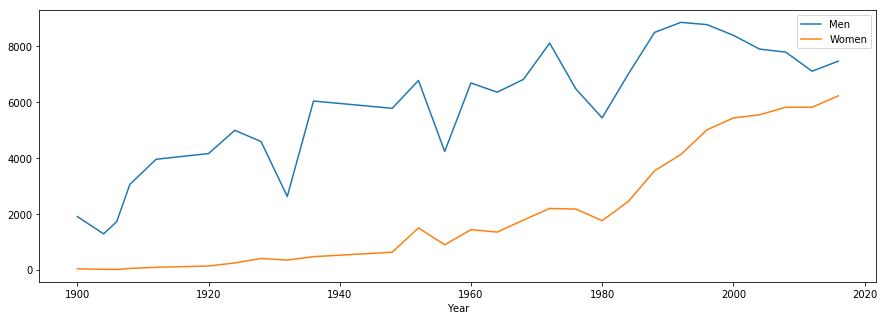

In [82]:
yearmenwomen = yearmenwomen.set_index('Year')
yearmenwomen.plot(kind = 'line')

# ----------------------------------------End of P.S.5---------------------------------------------------

In [45]:
# PS 6:  Are players who won medals for US in Basketeball game are mostly african-american people.

In [47]:
olympic = olympics
usbasketball = olympic[(olympic['Team']=='United States') & (olympic['Sport']=='Basketball') & ((olympic['Medal']=='Gold') | (olympic['Medal']=='Silver') | (olympic['Medal']=='Bronze'))]
usbasketball.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
609,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
4623,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
5031,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
6896,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
8164,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [48]:
ethinicity = pd.read_excel('Ethinicity.xlsx')
ethinicity.head()

,Names,Ethinicity
0,Julius Shareef Abdur-Rahim,african-american
1,"Stephen Todd ""Steve"" Alford",american
2,Walter Ray Allen,african-american
3,"William Lloyd ""Willie"" Anderson, Jr.",american
4,Carmelo Kyan Anthony,african-american


In [49]:
len(ethinicity[ethinicity['Ethinicity']=='african-american'])*100/len(ethinicity)

58.94428152492669

### Conclusion : Almost 59% of atheletes were 'African American' for winning medals 

## --------------------------------End of PS 6-------------------------------

In [63]:
# PS 7: probabilty for winnning medals between athletes participate in mulipile games vs athletes participate in single game

In [52]:
pl_wonmedal = olympic[(olympic['Medal']=='Gold') | (olympic['Medal']=='Silver') | (olympic['Medal']=='Bronze')]
pl_wonmedal.head()

,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [53]:
pl_single_game = olympic.groupby('Name').size().reset_index()
pl_single_game = pl_single_game[pl_single_game[0]==1]
pl_single_game.head()

,Name,0
0,"Gabrielle Marie ""Gabby"" Adcock (White-)",1
2,Jean Hauptmanns,1
4,Th Anh,1
6,Tin Tun,1
7,A Dijiang,1


In [54]:
pl_single_game = pl_single_game.rename(columns= {0:'count of single-game'})
pl_single_game.head()

,Name,count of single-game
0,"Gabrielle Marie ""Gabby"" Adcock (White-)",1
2,Jean Hauptmanns,1
4,Th Anh,1
6,Tin Tun,1
7,A Dijiang,1


In [55]:
pl_won_and_participated_single_game = pl_single_game[pl_single_game['Name'].isin(pl_wonmedal['Name'])]
pl_won_and_participated_single_game.head()

,Name,count of single-game
11,A. Albert,1
32,A. Lawry,1
33,A. M. Woods,1
38,A. R. Upton,1
47,A. Willcocks,1


In [57]:
len(pl_won_and_participated_single_game)*100 /  len(pl_single_game)
# probability of the winning the medals in multiple games by athelete

14.922931085976964

In [58]:
pl_multi_game = olympic.groupby('Name').size().reset_index()
pl_multi_game = pl_multi_game[pl_multi_game[0]>1]
pl_multi_game.head()

,Name,0
1,Eleonora Margarida Josephina Scmitt,2
3,Luis ngel Fernando de los Santos Grossi,5
5,Th Ngn Thng,7
10,A. Abdul Razzak,2
17,A. Dubois,3


In [59]:
pl_multi_game = pl_multi_game.rename(columns= {0:'count of multi-game'})
pl_multi_game.head()

,Name,count of multi-game
1,Eleonora Margarida Josephina Scmitt,2
3,Luis ngel Fernando de los Santos Grossi,5
5,Th Ngn Thng,7
10,A. Abdul Razzak,2
17,A. Dubois,3


In [60]:
pl_won_and_participated_multi_game = pl_multi_game[pl_multi_game['Name'].isin(pl_wonmedal['Name'])]
pl_won_and_participated_multi_game.head()

,Name,count of multi-game
17,A. Dubois,3
27,"A. Joshua ""Josh"" West",2
59,Aage Birch,3
64,Aage Ernst Larsen,2
68,Aage Hy Pedersen,2


In [61]:
len(pl_won_and_participated_multi_game)*100 /  len(pl_multi_game) # probability of the winning the medals in multi games by athelete

28.94859934514838

## Conclusion: From above we can say that the probability of winning medals in multiple game by athlete is more 

# -----------------------------------End of PS 7------------------------------------

#------------------------------------Document END--------------------------------------------------------------